In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mlxtend

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import squarify

In [5]:
dataset = pd.read_csv("Market_Basket_Optimisation.csv", header=None)

In [6]:
dataset.shape

(7501, 20)

In [7]:
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Checking Random Entries
dataset.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
197,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6830,fresh tuna,frozen vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
917,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4338,whole wheat rice,french fries,cookies,fresh bread,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1125,chocolate,frozen vegetables,light mayo,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6463,frozen vegetables,pepper,mineral water,chicken,strong cheese,chocolate,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6070,mineral water,muffins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
677,spaghetti,olive oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6825,chocolate,cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,mayonnaise,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


### Looking at frequency of most popular items

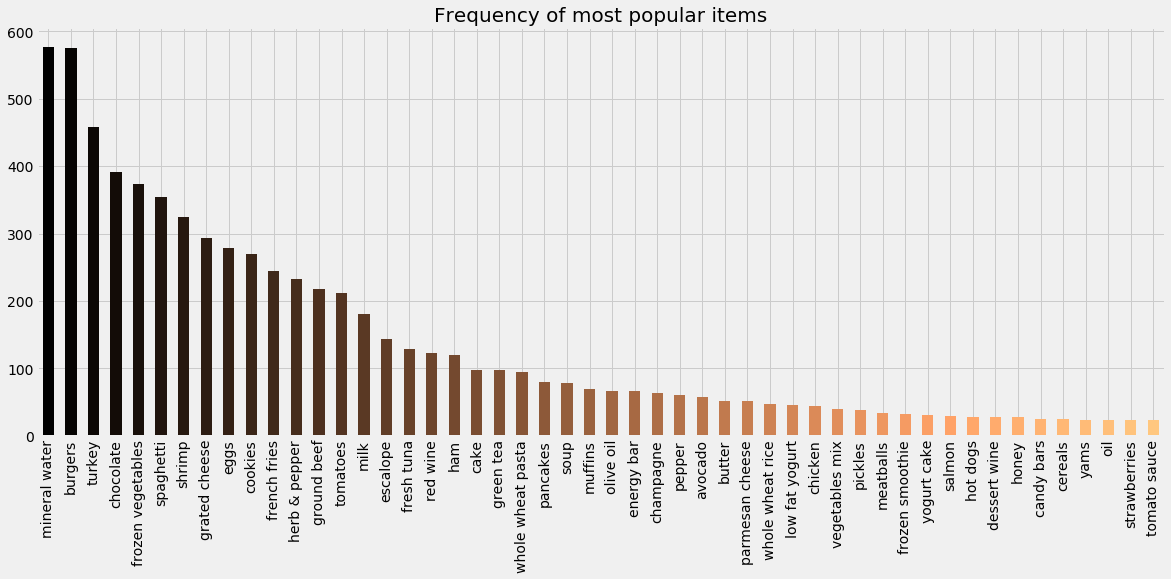

In [10]:
plt.rcParams['figure.figsize'] = (18,7)
color = plt.cm.copper(np.linspace(0,1,50))
dataset[0].value_counts().head(50).plot.bar(color=color)
plt.title('Frequency of most popular items', fontsize=20)
plt.show()

In [11]:
y = dataset[0].value_counts().to_frame()

In [12]:
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       ...
       'burger sauce', 'eggplant', 'mashed potato', 'cream', 'ketchup',
       'oatmeal', 'shampoo', 'cauliflower', 'corn', 'body spray'],
      dtype='object', length=115)

In [13]:
y = y.head(50)

In [14]:
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'olive oil',
       'energy bar', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'hot dogs', 'dessert wine', 'honey',
       'candy bars', 'cereals', 'yams', 'oil', 'strawberries', 'tomato sauce'],
      dtype='object')

### Plotting a Tree Map

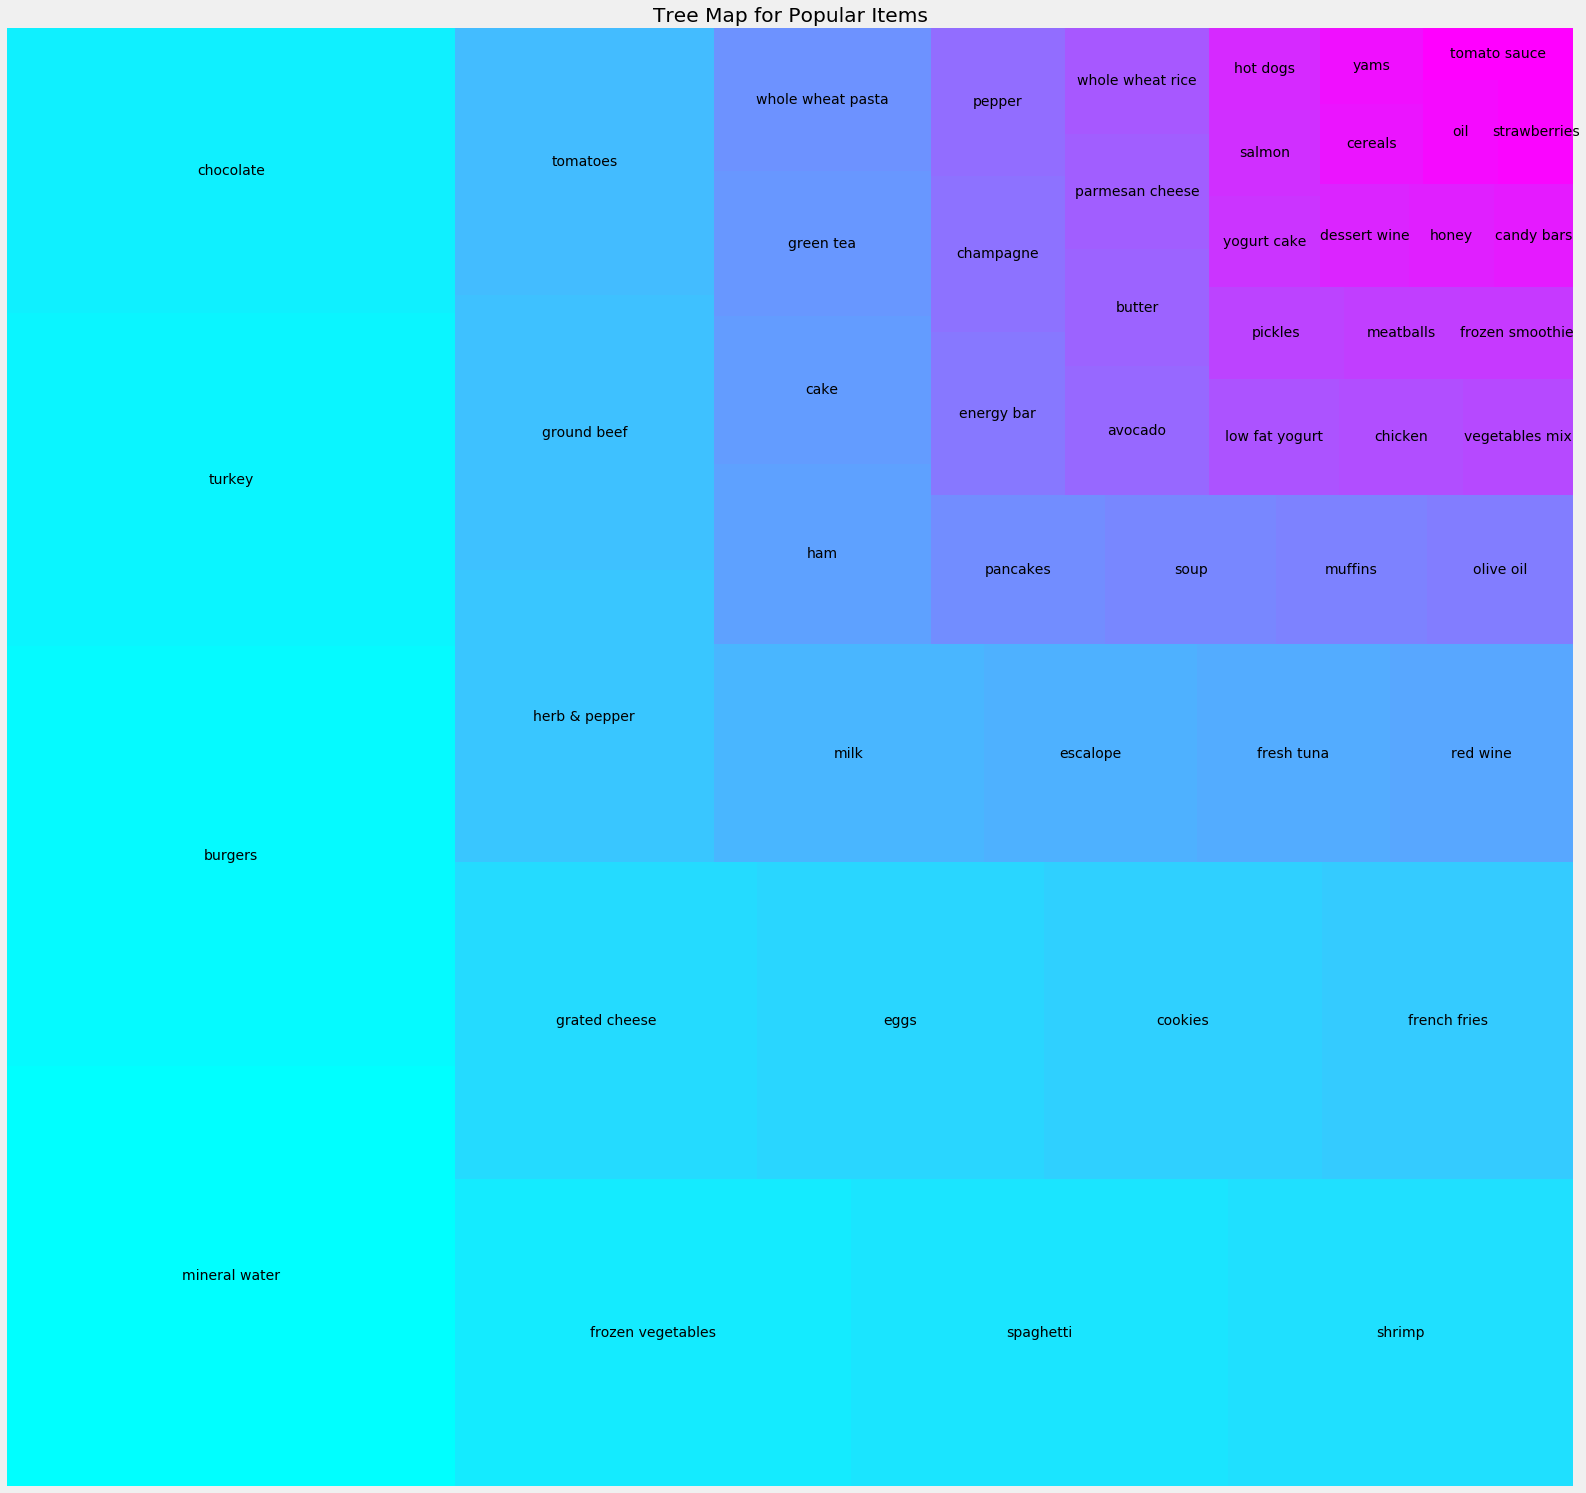

In [15]:
plt.rcParams['figure.figsize'] = (25,25)
color = plt.cm.cool(np.linspace(0,1,50))
squarify.plot(sizes=y.values,label=y.index, color=color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

### Data Processing

In [16]:
transactions = []

In [17]:
for i in range(0,7501):
    transactions.append([str(dataset.values[i, j]) for j in range(0,20)])

In [18]:
from apyori import apriori

In [19]:
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift=3, min_length = 2)

In [20]:
results = pd.DataFrame(rules)

In [21]:
results.to_csv('Submit.csv')

In [22]:
results.head(35)

,items,support,ordered_statistics
0,"(chicken, light cream)",0.004533,"[((light cream), (chicken), 0.2905982905982905..."
1,"(mushroom cream sauce, escalope)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(pasta, escalope)",0.005866,"[((pasta), (escalope), 0.3728813559322034, 4.7..."
3,"(fromage blanc, honey)",0.003333,"[((fromage blanc), (honey), 0.2450980392156863..."
4,"(herb & pepper, ground beef)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."
5,"(tomato sauce, ground beef)",0.005333,"[((tomato sauce), (ground beef), 0.37735849056..."
6,"(olive oil, light cream)",0.003200,"[((light cream), (olive oil), 0.20512820512820..."
7,"(olive oil, whole wheat pasta)",0.007999,"[((whole wheat pasta), (olive oil), 0.27149321..."
8,"(shrimp, pasta)",0.005066,"[((pasta), (shrimp), 0.3220338983050847, 4.506..."
9,"(milk, spaghetti, avocado)",0.003333,"[((spaghetti, avocado), (milk), 0.416666666666..."


In [23]:
from mlxtend.preprocessing import TransactionEncoder

In [24]:
te = TransactionEncoder()

In [25]:
data = te.fit(transactions).transform(transactions)

In [26]:
data = pd.DataFrame(data, columns=te.columns_)

In [27]:
data.shape

(7501, 121)

In [28]:
data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
data.columns

Index([' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado',
       'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries',
       ...
       'turkey', 'vegetables mix', 'water spray', 'white wine',
       'whole weat flour', 'whole wheat pasta', 'whole wheat rice', 'yams',
       'yogurt cake', 'zucchini'],
      dtype='object', length=121)

In [30]:
from mlxtend.frequent_patterns import apriori

In [31]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)

In [32]:
frequent_itemsets

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [33]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))

In [34]:
frequent_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


In [35]:
#getting item sets with length >=2 and support greater than 70%
frequent_itemsets_2 = frequent_itemsets[(frequent_itemsets['length']>=2) & (frequent_itemsets['support']>=0.07)]

In [36]:
frequent_itemsets_2

,support,itemsets,length
26,0.087188,"(nan, burgers)",2
27,0.081056,"(nan, cake)",2
30,0.163845,"(nan, chocolate)",2
31,0.080389,"(cookies, nan)",2
34,0.179709,"(eggs, nan)",2
35,0.079323,"(nan, escalope)",2
36,0.170911,"(nan, french fries)",2
38,0.095321,"(frozen vegetables, nan)",2
40,0.131982,"(nan, green tea)",2
41,0.098254,"(nan, ground beef)",2


In [37]:
from mlxtend.frequent_patterns import association_rules

In [38]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(burgers),(nan),0.087188,0.999867,0.087188,1.000000,1.000133,0.000012,inf
1,(cake),(nan),0.081056,0.999867,0.081056,1.000000,1.000133,0.000011,inf
2,(chicken),(nan),0.059992,0.999867,0.059992,1.000000,1.000133,0.000008,inf
3,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
5,(nan),(chocolate),0.999867,0.163845,0.163845,0.163867,1.000133,0.000022,1.000026
6,(chocolate),(nan),0.163845,0.999867,0.163845,1.000000,1.000133,0.000022,inf
7,(cookies),(nan),0.080389,0.999867,0.080389,1.000000,1.000133,0.000011,inf
8,(cooking oil),(nan),0.051060,0.999867,0.051060,1.000000,1.000133,0.000007,inf
9,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815


In [39]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.3)

In [40]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
4,"(mineral water, nan)",(chocolate),0.238235,0.163845,0.052660,0.221041,1.349087,0.013626,1.073426
5,"(nan, chocolate)",(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
6,(mineral water),"(nan, chocolate)",0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
7,(chocolate),"(mineral water, nan)",0.163845,0.238235,0.052660,0.321400,1.349087,0.013626,1.122553
8,"(spaghetti, nan)",(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
9,"(mineral water, nan)",(spaghetti),0.238235,0.174110,0.059725,0.250699,1.439890,0.018246,1.102215


In [41]:
rules['antecedents_len'] = rules['antecedents'].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,1
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,1
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,1
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,1
4,"(mineral water, nan)",(chocolate),0.238235,0.163845,0.052660,0.221041,1.349087,0.013626,1.073426,2
5,"(nan, chocolate)",(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,2
6,(mineral water),"(nan, chocolate)",0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,1
7,(chocolate),"(mineral water, nan)",0.163845,0.238235,0.052660,0.321400,1.349087,0.013626,1.122553,1
8,"(spaghetti, nan)",(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,2
9,"(mineral water, nan)",(spaghetti),0.238235,0.174110,0.059725,0.250699,1.439890,0.018246,1.102215,2


In [42]:
rules[ (rules['antecedents_len'] >= 2) &
       (rules['confidence'] > 0.25) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
5,"(nan, chocolate)",(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,2
8,"(spaghetti, nan)",(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,2
9,"(mineral water, nan)",(spaghetti),0.238235,0.174110,0.059725,0.250699,1.439890,0.018246,1.102215,2
